In [1]:
import numpy as np

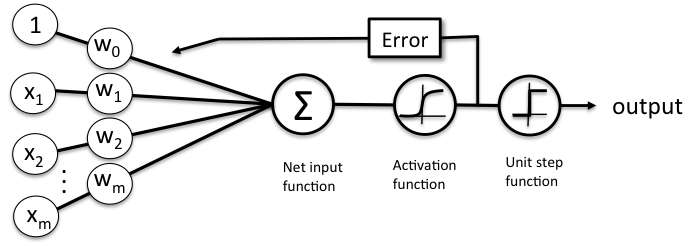

# 시그모이드 함수


In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# 3층 신경망 구현하기

<div>
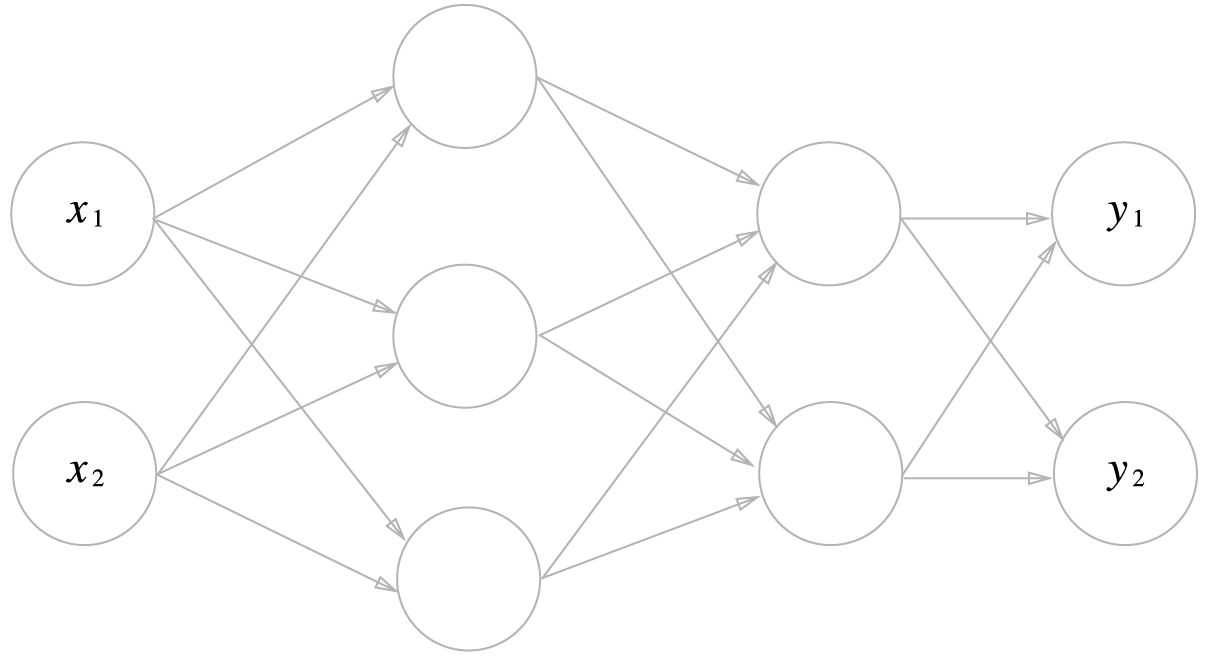
</div>


<div>
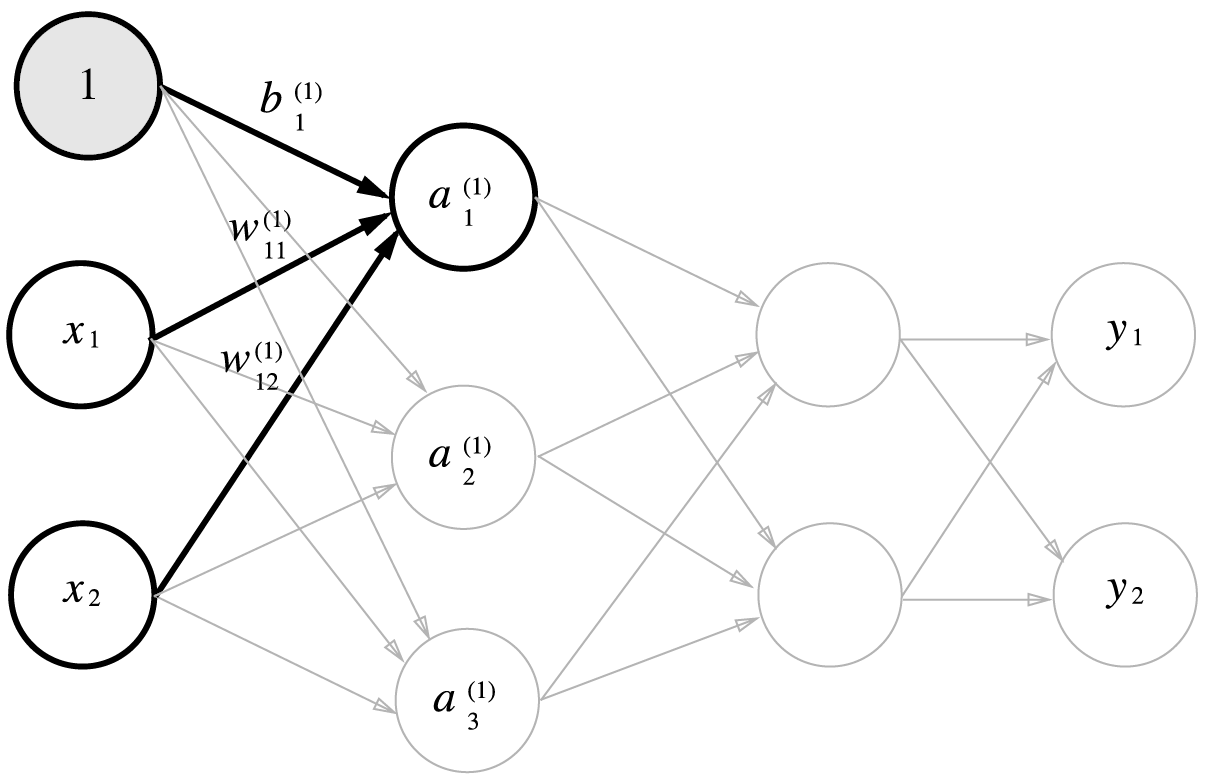
</div>

In [15]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [16]:
print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [17]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])


<div>
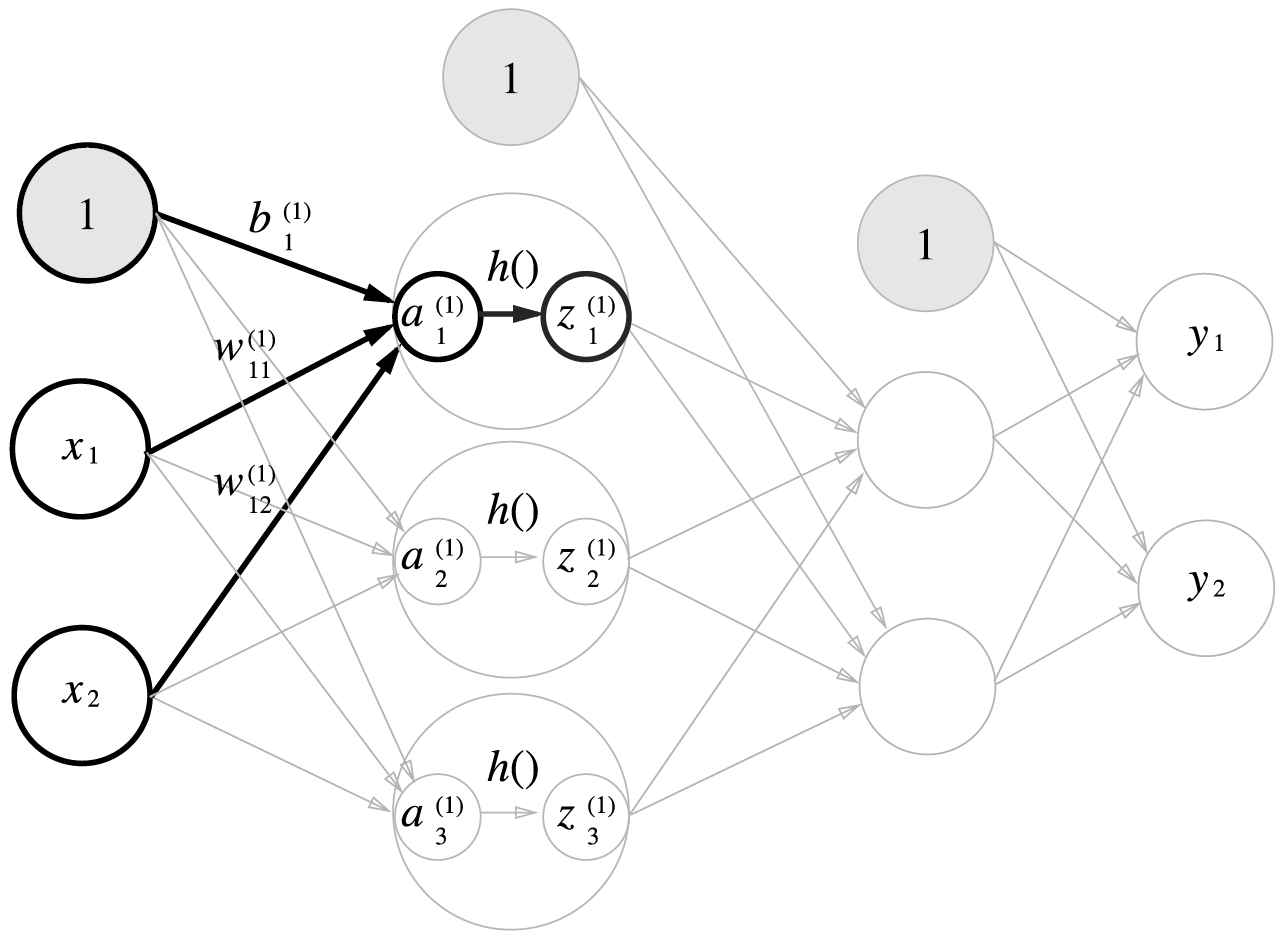
</div>

In [18]:
Z1 = sigmoid(A1)
print(A1)
Z1

[0.3 0.7 1.1]


array([0.57444252, 0.66818777, 0.75026011])



<div>
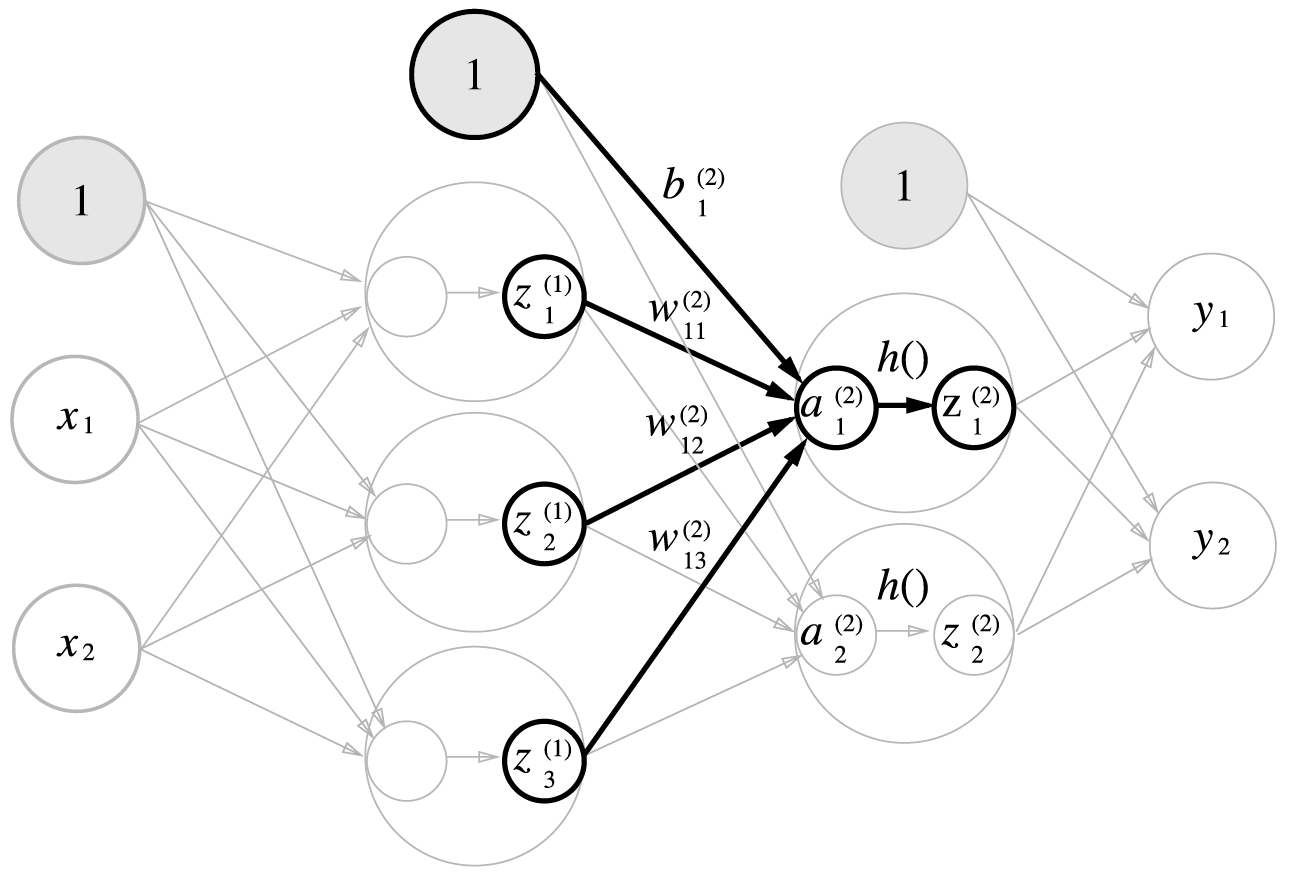
</div>

In [ ]:
a= np.array[a, b] 
b = np.arrray[[x], [y]]


In [ ]:
a= np.array[ax, 1] 
b = np.arrray[[1], [by]]

In [19]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [20]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

# 출력층 설계하기

## 소프트맥스 함수

$$y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_k)}$$

위의 식을 조작을 통해서 아래와 같이 만든다. 
$$y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} = \frac{C exp(a_k)}{C  \sum_{i=1}^n exp(a_i)}=\frac{exp(a_k+\log C)}{\sum_{i=1}^n exp(a_i+\log C)}=\frac{exp(a_k+\hat {C})}{\sum_{i=1}^n exp(a_i+ \hat{C})}$$

In [2]:
import numpy as np

def softmax(a):
    C = np.max(a)
    return np.exp(a - C) / np.sum(np.exp(a-C))

In [5]:
a = np.array([10000, 10012, 10013])
softmax(a)

array([1.65243047e-06, 2.68940977e-01, 7.31057371e-01])

In [4]:
np.sum(softmax(a))

1.0

출력 총합이 1이 되기 때문에 확률로 해설 할수 있습니다. 

그런데 왜 exp 를 사용 하는 것일까요?

# 손글씨 숫자 인식

In [2]:
import sys,os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

In [10]:
( x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [11]:
x_train[0].shape

(784,)

In [12]:
x_train.shape

(60000, 784)

In [13]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [15]:
( x_train2, t_train2), (x_test2, t_test2) = load_mnist(flatten=False, normalize=False)

In [16]:
x_train2.shape

(60000, 1, 28, 28)

In [17]:
x_train2[0]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [18]:
x_train[0].reshape(1,28,28)

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

In [20]:
x_train[0].reshape(-1) # Faltten

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [14]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

In [18]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
    
img = x_train[0]
label = t_train[0]
print(label)

5


In [19]:
img = img.reshape(-1,28)

In [20]:
img_show(img)

# 신경망의 추론 처리

In [13]:
import numpy as np
from dataset.mnist import load_mnist
import pickle

In [14]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [15]:
def softmax(a):
    C = np.max(a)
    return np.exp(a - C) / np.sum(np.exp(a-C))

In [16]:
def get_data():
    (x_train, _), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [17]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f: 
        network = pickle.load(f)
    return network

In [18]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [19]:
x, t = get_data()

In [20]:
network = init_network()

In [27]:
network.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [28]:
network['W1'].shape

(784, 50)

In [31]:
x.shape


(10000, 784)

In [35]:
accuracy_cnt = 0
k = 0 
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    k += 1
    if p == t[i]:
        accuracy_cnt += 1 

print("Accuracy:"+ str(float(accuracy_cnt)/len(x)))
print(k)

Accuracy:0.9352
10000


In [36]:
batch_size = 100
accuracy_cnt = 0 
k = 0 

for i in range(0, len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis= 1 )
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    k+=1 
    
print("Accuracy:"+ str(float(accuracy_cnt)/len(x)))
print(k)

Accuracy:0.9352
100


면접 : 뱃츠사이즈: 32배수 GPU
어떤 환경 어떻게 쓰느냐? 쓸수 있는 컴퓨테이션 코스트
내 2일 만에 돌려